# Model selection using a human hindbrain dataset

In this notebook, we use RegVelo's `ModelCaomparison` class to select a model setup on the human hindbrain dataset from [Braun, E. et al, 2023](https://www.science.org/doi/10.1126/science.adf1226) that we previously preprocessed. For model evaluation, we use the cross-boundary correctness (CBC) based on known hindbrain trajectories.

A detailed tutorial on how to use RegVelo's `ModelComparison` class is provided in the [Model Comparison Tutorial](https://regvelo.readthedocs.io/en/latest/tutorials/modelcomparison/ModelComp.html).

## Library import

In [1]:
import numpy as np
import scanpy as sc

import cellrank as cr
import scvi
import scvelo as scv

from regvelo import REGVELOVI
from regvelo import ModelComparison
import regvelo as rgv

## General settings

In [2]:
scvi.settings.seed = 0

[rank: 0] Seed set to 0


In [3]:
scv.settings.set_figure_params("scvelo", dpi=80, transparent=True, fontsize=14, color_map="viridis")

In [4]:
%matplotlib inline

## Load data

In the following, we load the preprocessed embryonic hindbrain dataset from the previous tutorial notebook and define the ground truth transitions used for model evaluation.

In [5]:
adata = rgv.datasets.hindbrain(data_type = "preprocessed")

In [6]:
STATE_TRANSITIONS = [
    ("Hindbrain neuroblast", "Pontocerebellar glutamatergic"),
    ("Hindbrain neuroblast", "Dorsal interneurons"),
    ("Hindbrain neuroblast", "Dorsal sensory neuroblasts"),
    ("Hindbrain radial glia", "Visceral motor neuron"),
]

## ModelComparison

### Object initialization

We now initialize the `ModelComparison` object and sepcify the parameter `state_transition`.

In [7]:
comp = ModelComparison(state_transition=STATE_TRANSITIONS)

### Train
We set `batch_size` to `np.min(adata.shape[0], 5000)` to avoid out of memory issue.

In [8]:
comp.train(adata=adata, 
           model_list=['soft','hard','soft_regularized'],
           lam2=[1.0],
           n_repeat=1,
           batch_size=min(adata.shape[0], 5000))

[rank: 0] Seed set to 0
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.

Epoch 442/1500:  29%|██▉       | 442/1500 [40:39<1:37:18,  5.52s/it, v_num=1]


[rank: 0] Seed set to 0


Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2095.273. Signaling Trainer to stop.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425:

Epoch 848/1500:  57%|█████▋    | 848/1500 [1:17:29<59:35,  5.48s/it, v_num=1]  

[rank: 0] Seed set to 0



Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2043.481. Signaling Trainer to stop.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/home/icb/yifan.chen/miniconda3/envs/regvelo_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425:

Epoch 685/1500:  46%|████▌     | 685/1500 [1:03:17<1:15:18,  5.54s/it, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: -2030.300. Signaling Trainer to stop.


['soft_0', 'hard_0', 'soft_regularized\nlam2:1.0_0']

### Evaluate and save

We use CBC to evaluate if the model's inferred transitions align with the ground truth state changes and specify the parameter `side_key`, which contains cell-type annotations stored in `adata.obs`.

In [9]:
comp.evaluate(side_information='CBC',
              side_key='regvelo_annotation')

100%|██████████| 49469/49469 [00:13<00:00, 3741.13cell/s]


('df_CBC',
                         Model      Corr Run
 0                        soft  0.695765   0
 1                        hard  0.686511   0
 2  soft_regularized\nlam2:1.0  0.744029   0)

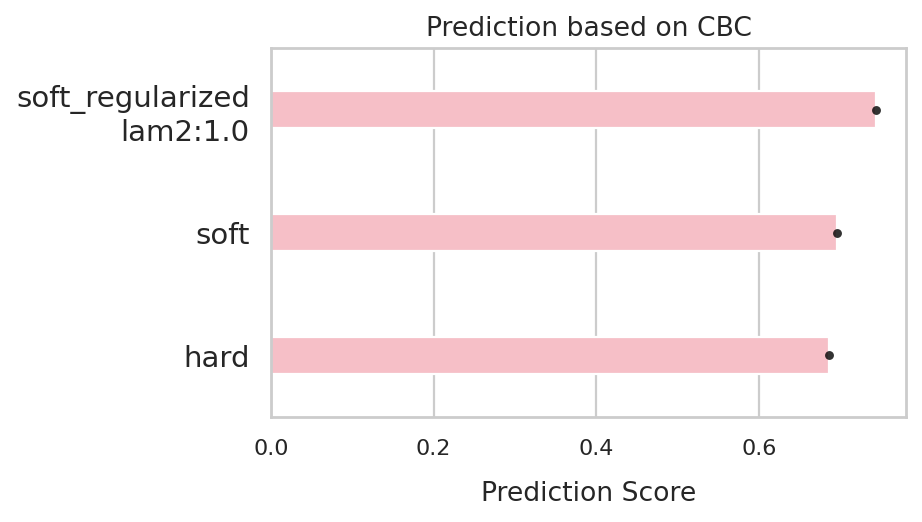

In [10]:
comp.plot_results(side_information='CBC')

In [11]:
vae_sr = comp.MODEL_TRAINED['soft_regularized\nlam2:1.0_0']
vae_sr.save('vae_sr')

## Trajectory and latent time prediction

In [12]:
vae_sr = REGVELOVI.load('vae_sr', adata)
rgv.tl.set_output(adata, vae_sr, n_samples=30, batch_size=5000)

INFO     File vae_sr/model.pt already downloaded                                                                   


In [13]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:01:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [16]:
scv.settings.set_figure_params("scvelo", dpi=80, transparent=True, fontsize=14, color_map="viridis")

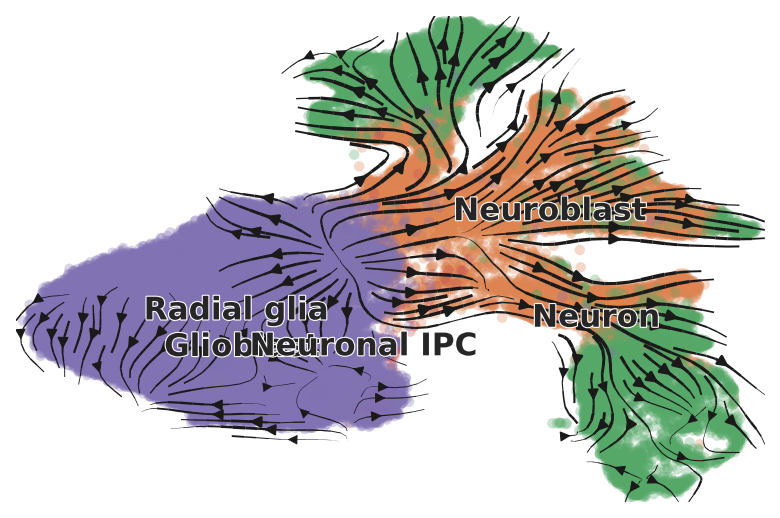

In [17]:
scv.pl.velocity_embedding_stream(adata, basis="umap", title="", color = "CellClass")

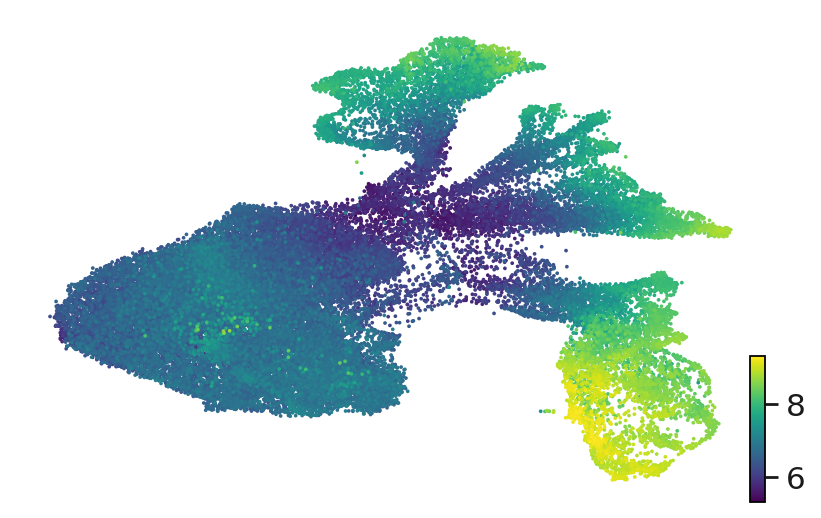

In [18]:
adata.obs["latent_time"] = adata.layers["fit_t"].mean(1)
scv.pl.scatter(adata, basis="umap", title="",color = ["latent_time"],legend_loc = "on data")